In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Car Sale.csv')

In [ ]:
df.head()

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
Car_id,0
Date,0
Customer Name,0
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


***1.What is the avarage selling price of cars for each dealer,and how does it compare accross different dealers?***

In [ ]:
df['Dealer_Name'].unique()

array(["Buddy Storbeck's Diesel Service Inc", 'C & M Motors Inc',
       'Capitol KIA', 'Chrysler of Tri-Cities', 'Chrysler Plymouth',
       'Classic Chevy', 'Clay Johnson Auto Sales', 'U-Haul CO',
       'Rabun Used Car Sales', 'Race Car Help', 'Saab-Belle Dodge',
       'Scrivener Performance Engineering', 'Diehl Motor CO Inc',
       'Star Enterprises Inc', 'Suburban Ford', 'Tri-State Mack Inc',
       'Progressive Shippers Cooperative Association No',
       'Ryder Truck Rental and Leasing', 'Enterprise Rent A Car',
       'Gartner Buick Hyundai Saab', 'Hatfield Volkswagen',
       'Iceberg Rentals', 'McKinney Dodge Chrysler Jeep',
       'Motor Vehicle Branch Office', 'Nebo Chevrolet',
       'New Castle Ford Lincoln Mercury', 'Pars Auto Sales',
       'Pitre Buick-Pontiac-Gmc of Scottsdale'], dtype=object)

In [ ]:
df['Dealer_Name'].value_counts()

,count
Dealer_Name,
Progressive Shippers Cooperative Association No,1318
Rabun Used Car Sales,1313
Race Car Help,1253
Saab-Belle Dodge,1250
Star Enterprises Inc,1249
Tri-State Mack Inc,1249
Ryder Truck Rental and Leasing,1248
U-Haul CO,1247
Scrivener Performance Engineering,1246


In [ ]:
df['Price ($)'].value_counts()

,count
Price ($),
22000,1191
19000,974
21000,873
26000,689
18000,627
...,...
13350,1
20101,1
49601,1


In [ ]:
avg_selling_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean()
print(avg_selling_price_by_dealer)

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.261563
C & M Motors Inc                                   28111.755200
Capitol KIA                                        28189.703822
Chrysler Plymouth                                  27555.526400
Chrysler of Tri-Cities                             28123.091054
Classic Chevy                                      28602.014446
Clay Johnson Auto Sales                            27816.027113
Diehl Motor CO Inc                                 27993.929487
Enterprise Rent A Car                              28312.580800
Gartner Buick Hyundai Saab                         28247.621019
Hatfield Volkswagen                                27853.712242
Iceberg Rentals                                    28522.958533
McKinney Dodge Chrysler Jeep                       27684.096979
Motor Vehicle Branch Office                        27956.739617
Nebo Chevrolet                                     27818.889415
New Castle Ford Lincoln Merc

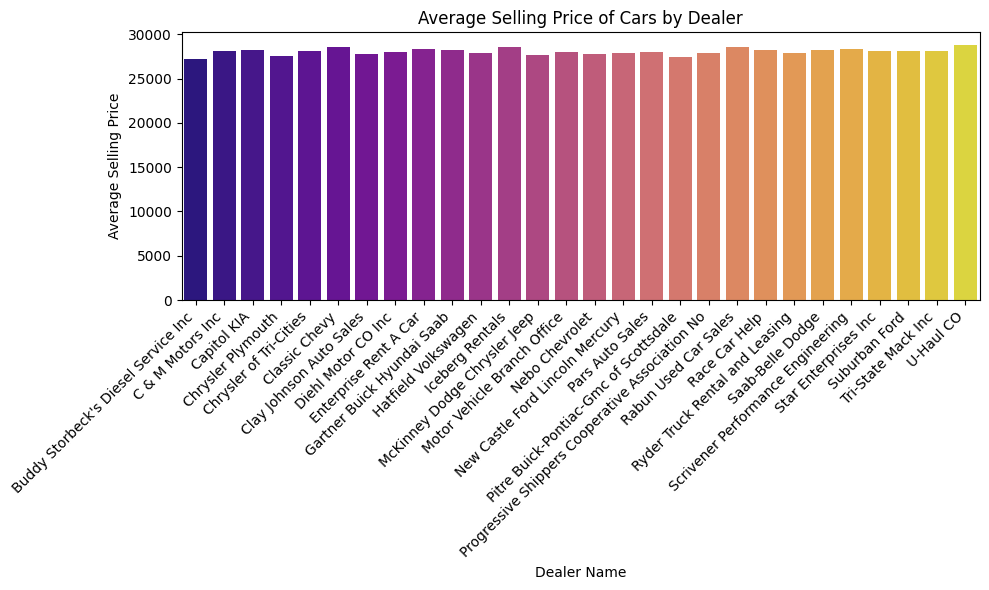

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_selling_price_by_dealer.index, y=avg_selling_price_by_dealer.values, palette='plasma')
plt.title('Average Selling Price of Cars by Dealer')
plt.xlabel('Dealer Name')
plt.ylabel('Average Selling Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***2.Which car brand(company) has the highest variation in prices,and what does this tell us about pricing trends?***

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
#Calculate Price Variation for Each Brand:
price_variation_by_brand = df.groupby('Model')['Price ($)'].std()
print(price_variation_by_brand)

Model
3-Sep       21403.933176
3000GT       6238.010306
300M         4229.419059
323i         4750.820214
328i        18800.231598
                ...     
Viper        6897.549327
Voyager     23064.019494
Windstar     6307.737514
Wrangler    10409.485641
Xterra       9640.303739
Name: Price ($), Length: 154, dtype: float64


In [ ]:
#Find the Brand with the Highest Variation:
brand_with_highest_variation = price_variation_by_brand.idxmax()
print(brand_with_highest_variation)

Continental


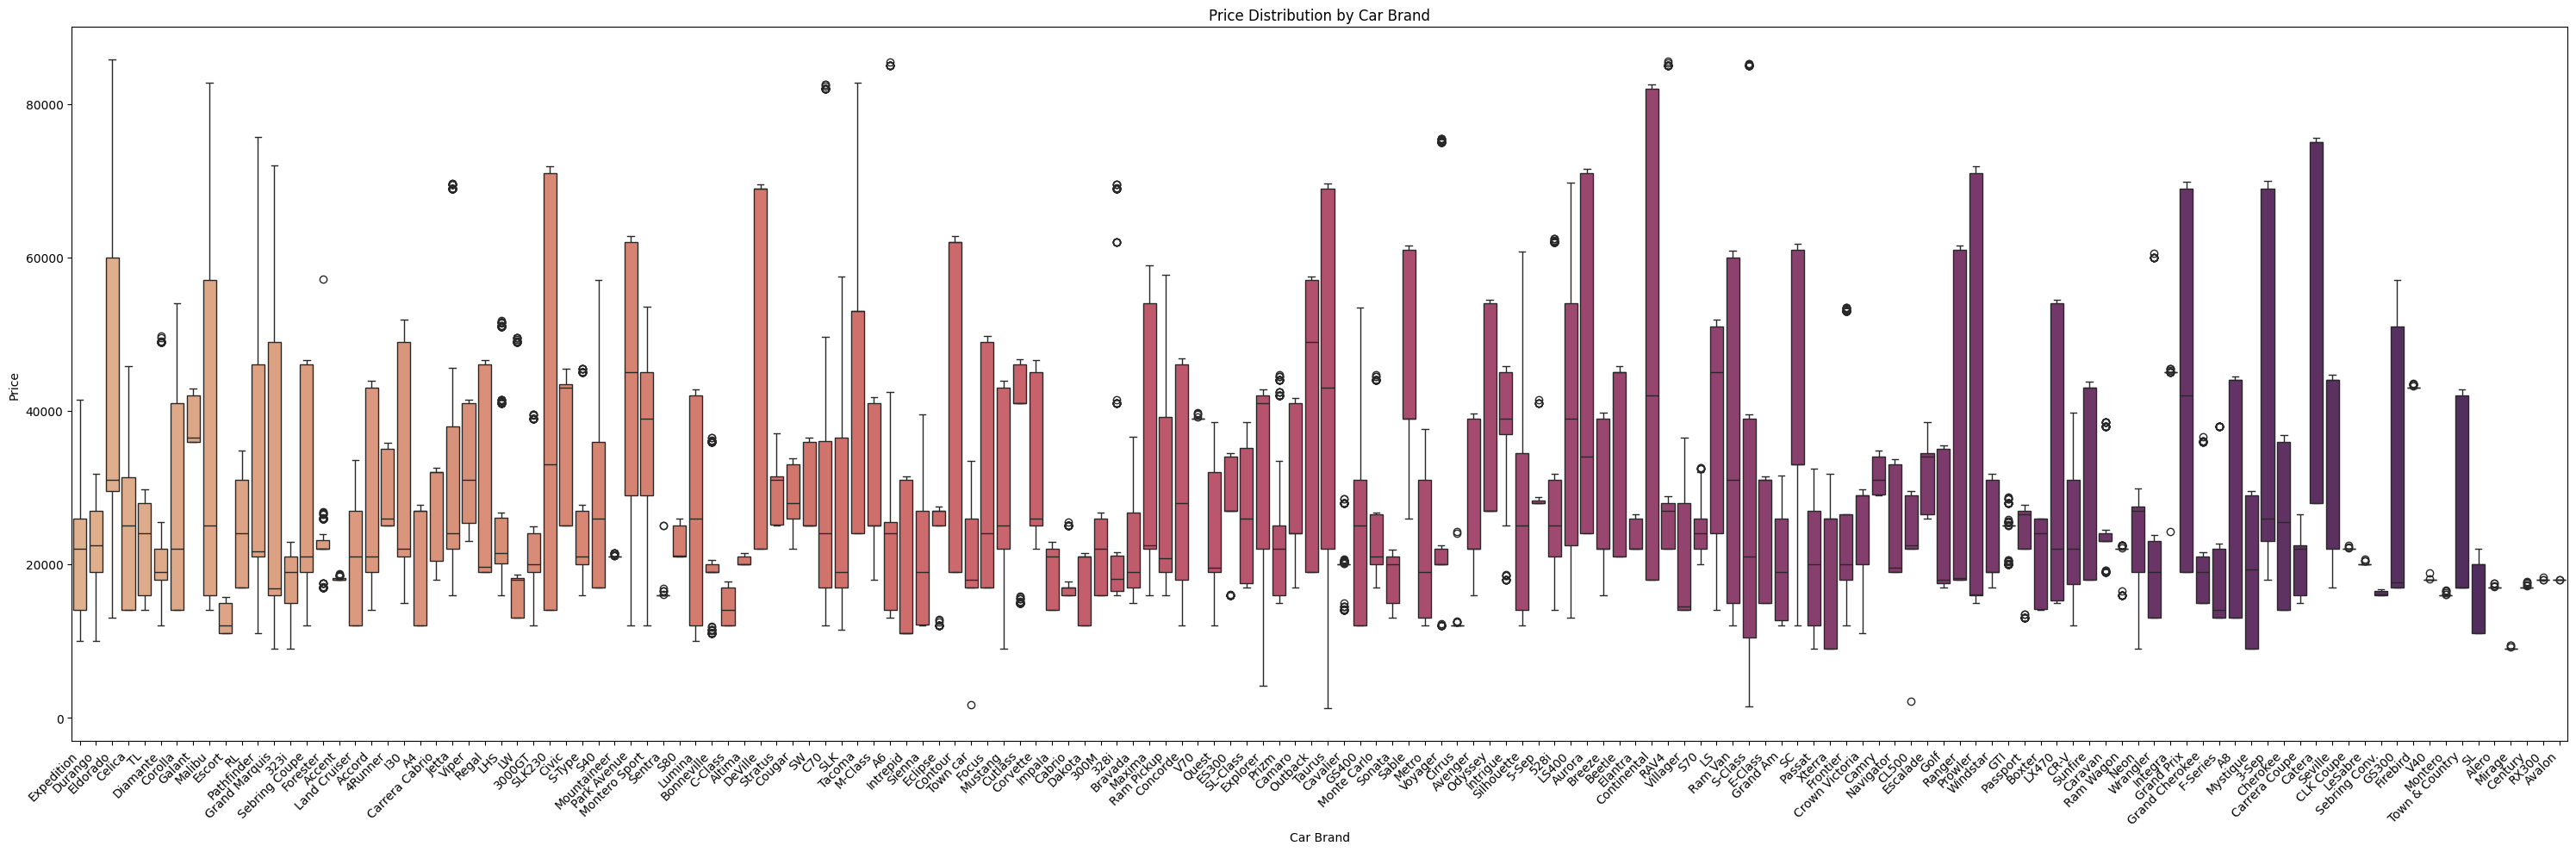

In [ ]:
plt.figure(figsize=(30, 10))
sns.boxplot(x='Model', y='Price ($)', data=df,palette='flare')
plt.title('Price Distribution by Car Brand')
plt.xlabel('Car Brand')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insights about Pricing Trends:**

High price variation for a specific car brand might suggest a few things:

*Wide range of models and trims:*

The brand might offer a variety of models with different features and price points, leading to larger price differences.

*Variable demand:*

Popular or in-demand models from that brand could have higher prices, while less popular models might be priced lower.

*Negotiation:*

There might be more room for negotiation on the prices of cars from that brand, leading to variability in final selling prices.

*External factors:*

Supply chain issues, economic conditions, or regional differences in pricing strategies could also contribute to price variation.

***3.What is the distribution of car prices for each transmission type,and how do the interquartile ranges compare?***

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df['Transmission'].unique()

array(['Auto', 'Manual'], dtype=object)

In [ ]:
df['Transmission'].value_counts()

,count
Transmission,
Auto,12570
Manual,11335


In [ ]:
#Group data by transmission type and calculate price statistics:
distribution = df.groupby('Transmission')['Price ($)'].describe()
print(distribution)

                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12570.0  28247.193317  13746.805377  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  


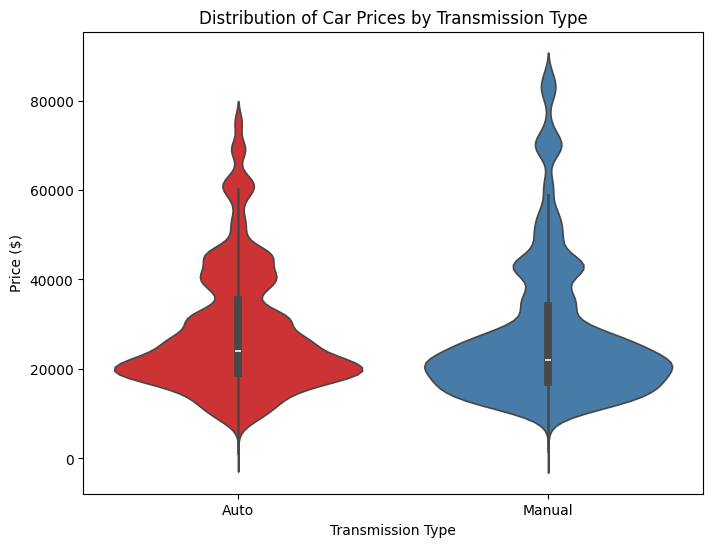

In [ ]:
#Visualize the distribution using violin plots:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Transmission', y='Price ($)', data=df,palette='Set1')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.show()



In [ ]:
#Compare the interquartile ranges (IQRs):
automatic_iqr = distribution.loc['Auto', '75%'] - distribution.loc['Auto', '25%']
manual_iqr = distribution.loc['Manual', '75%'] - distribution.loc['Manual', '25%']
print(f"Automatic IQR: {automatic_iqr}")
print(f"Manual IQR: {manual_iqr}")


Automatic IQR: 16500.0
Manual IQR: 17000.0


***4.What is the distribution of car prices accross the regions?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df["Dealer_Region"].unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [ ]:
df['Price ($)'].unique()

array([26000, 19000, 31500, 14000, 24500, 12000, 42000, 82000, 15000,
       31000, 46000,  9000, 17000, 18000, 33000, 21000, 25000, 22000,
       31250, 41000, 13000, 20000, 43000, 16000, 61000, 39000, 42500,
       45001, 36001, 21001, 29000, 27000, 25600, 36000, 31100, 22600,
       45000, 62000, 22700, 49000, 28000, 22001, 25001, 12800, 22500,
       46500, 54000, 16001, 38000, 21200, 71000, 57001, 62001, 69001,
       20001, 26750, 24000, 28501, 15500, 12500, 27250, 11000, 26500,
       69000, 14150, 60500, 44000, 11650, 11800, 27500, 16900, 14200,
       51000, 32000, 39500, 13500,  9250, 29500, 18501, 17001, 23500,
       53000, 60750, 24001, 35000, 18500, 21500, 41100, 20200, 59000,
       57000, 25500, 19100, 10000, 23000, 11501, 24250, 37000, 54500,
       25100, 34000, 21900, 29200, 85000, 43500, 14500, 16500, 85600,
       75000, 71500, 61500, 19500, 29001, 60000, 28001, 60001, 22100,
       21100, 31001, 36600, 53500, 49300, 17500, 26001, 23501,  9200,
       22650, 57500,

In [ ]:
Distribution_car_prices=df.groupby('Dealer_Region')['Price ($)'].describe()
print(Distribution_car_prices)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3129.0  28329.300735  15025.653685  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

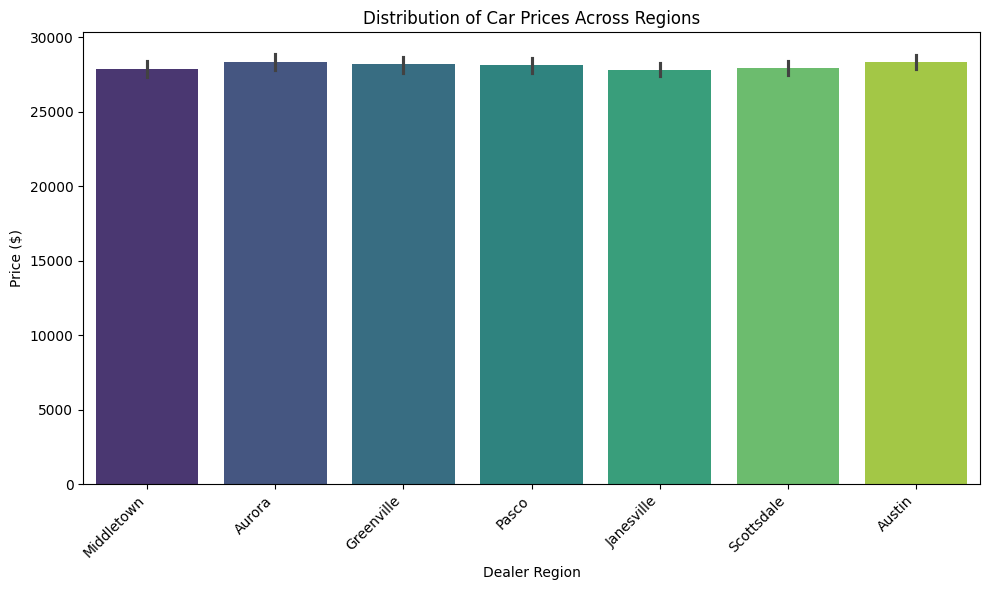

In [ ]:
#lets visualize  Distribution of car prices accross region using
plt.figure(figsize=(10, 6))
sns.barplot(x='Dealer_Region', y='Price ($)', data=df, palette='viridis')
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***5.What is the distribution of car prices based on body style?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

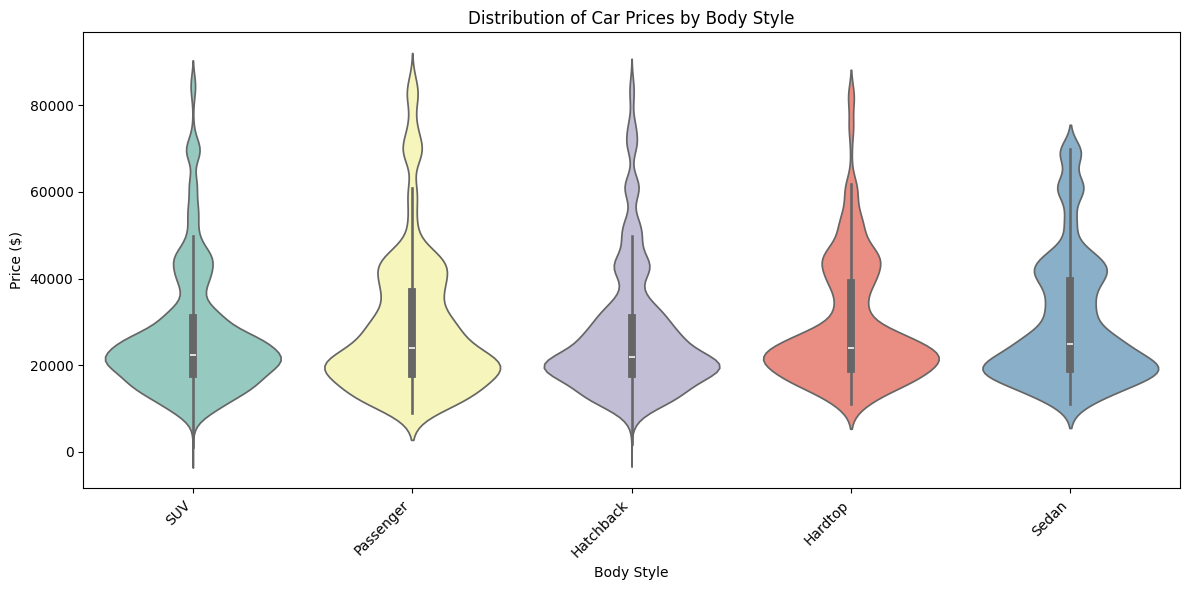

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Body Style', y='Price ($)', data=df, palette='Set3')
plt.title('Distribution of Car Prices by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***6.How does the avarge selling price of cars vary by customer gender and annual income?***

In [ ]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
#avarage selling price of car
avg_selling_price_car = df.groupby('Company')['Price ($)'].mean()
print(avg_selling_price_car)

Company
Acura         24758.561684
Audi          22851.790598
BMW           25090.622785
Buick         33634.362187
Cadillac      40972.093558
Chevrolet     26198.606377
Chrysler      26019.529464
Dodge         26395.207186
Ford          29263.682156
Honda         28082.959040
Hyundai       19386.234848
Infiniti      29318.153846
Jaguar        25138.194444
Jeep          21057.338843
Lexus         34024.567332
Lincoln       31407.036585
Mercedes-B    26944.842802
Mercury       28535.163616
Mitsubishi    26673.818324
Nissan        27047.511287
Oldsmobile    31894.250225
Plymouth      29404.980551
Pontiac       29358.300251
Porsche       22674.894737
Saab          36516.338095
Saturn        31092.609215
Subaru        27931.340741
Toyota        29513.120721
Volkswagen    25568.552888
Volvo         27788.593156
Name: Price ($), dtype: float64


In [ ]:
avg_price_by_gender_income = df.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print(avg_price_by_gender_income)

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


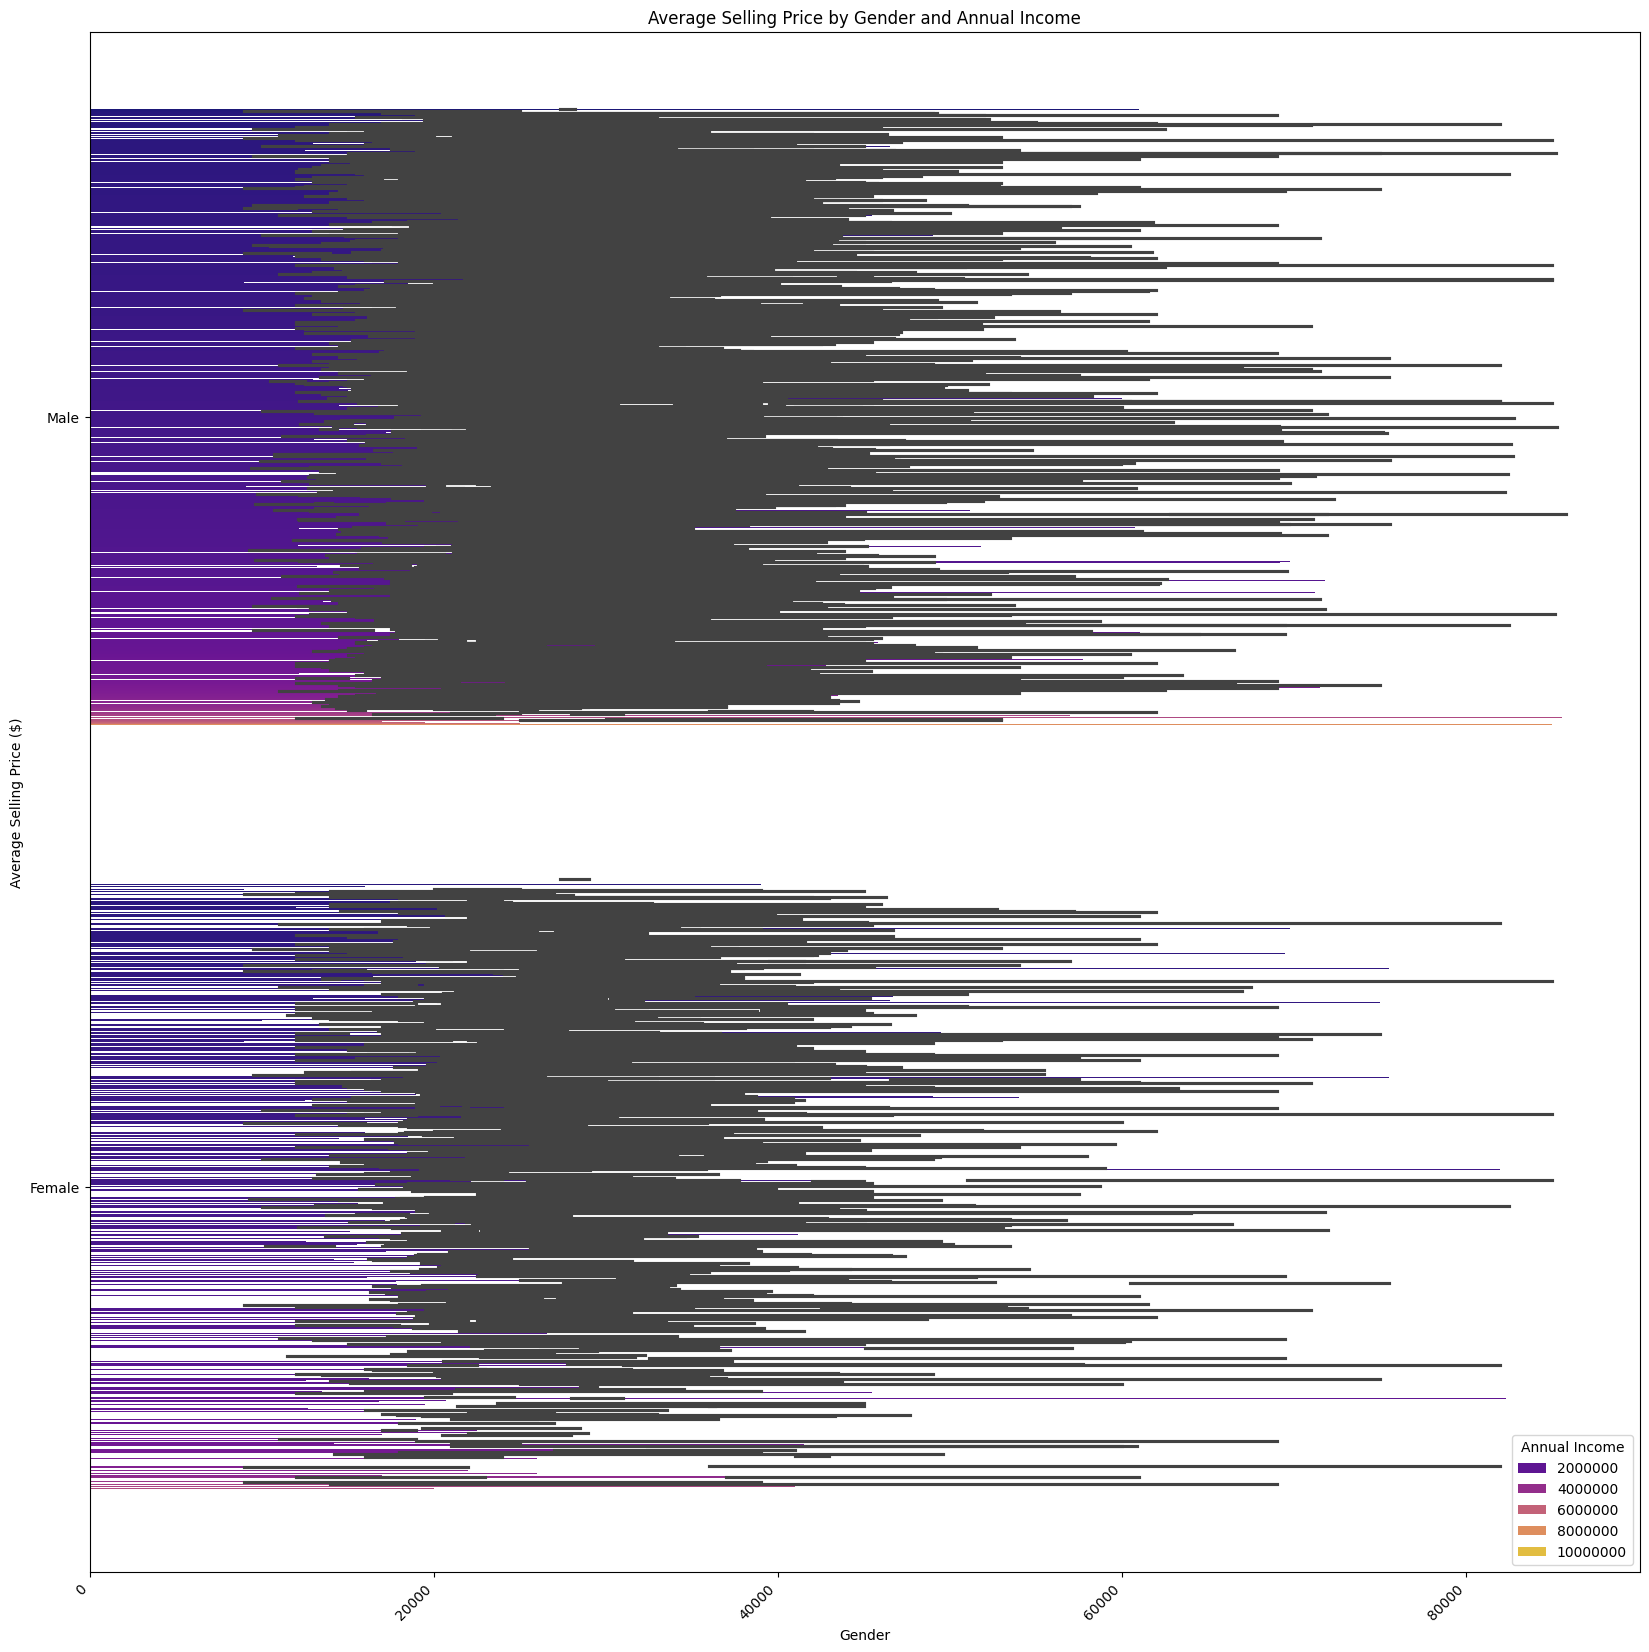

In [ ]:
plt.figure(figsize=(20,20))
sns.barplot(y='Gender', x='Price ($)', hue='Annual Income', data=df, palette='plasma')
plt.title('Average Selling Price by Gender and Annual Income')
plt.xlabel('Gender')
plt.ylabel('Average Selling Price ($)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Annual Income')
plt.show()

***7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df['Dealer_Region'].unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [ ]:
df['Dealer_Region'].value_counts()

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Middletown,3128
Greenville,3128


In [ ]:
distribution_car_prices_region = df.groupby('Dealer_Region')['Price ($)'].describe()
print(distribution_car_prices_region)

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

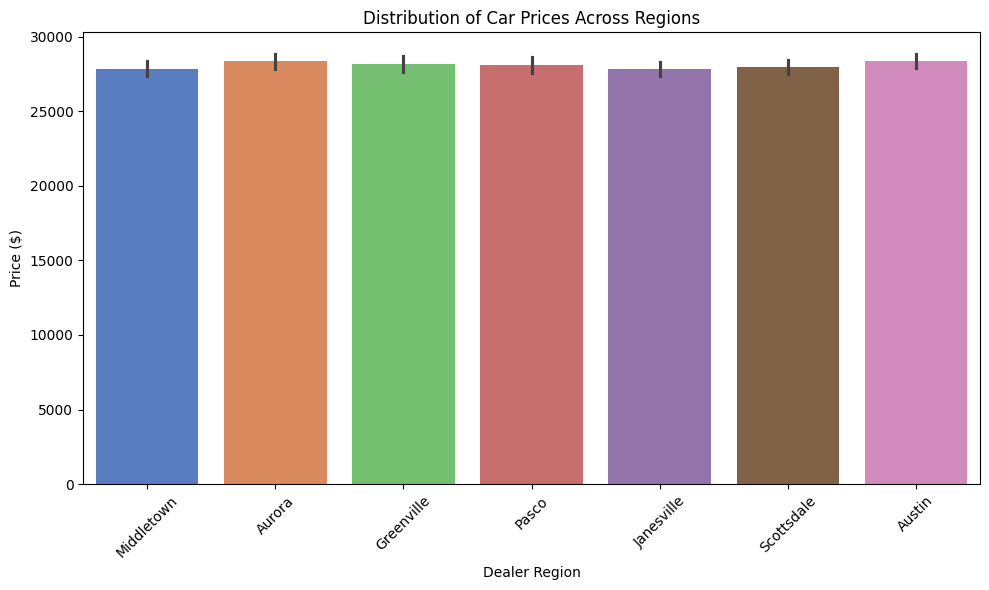

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Dealer_Region', y='Price ($)',data=df, palette='muted')
plt.title('Distribution of Car Prices Across Regions')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Insight:

Regional differences in factors like supply and demand, economic conditions, and taxes can also contribute to variations in car prices.
we can also assume the standar devaition of car prices accross the region.

In [ ]:
#number of car sold vary by region
car_sold_by_region_company= df.groupby('Dealer_Region')['Company'].count()
print(car_sold_by_region)

Dealer_Region  Company   
Aurora         Chevrolet     223
               Dodge         214
               Ford          213
               Mercedes-B    191
               Mitsubishi    170
                            ... 
Scottsdale     Hyundai        53
               Porsche        40
               Jaguar         35
               Saab           31
               Infiniti       21
Name: count, Length: 210, dtype: int64


In [ ]:
cars_sold_by_region = df.groupby('Dealer_Region')['Model'].count()
print(cars_sold_by_region)

Dealer_Region
Aurora        3130
Austin        4135
Greenville    3128
Janesville    3821
Middletown    3128
Pasco         3131
Scottsdale    3433
Name: Model, dtype: int64


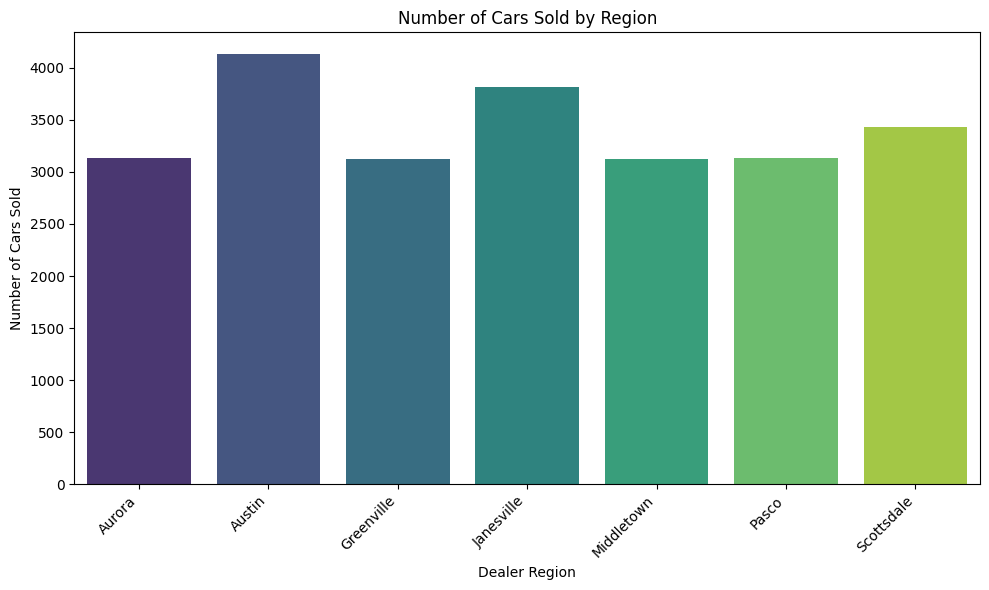

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='viridis')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Dealer Region')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insights:
   previous output various type of car model is sold more than other region.this is austin.

***8.How does the avarage car price differ between cars with different engine sizes?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [ ]:
df['Engine'].value_counts()

,count
Engine,
DoubleÂ Overhead Camshaft,12571
Overhead Camshaft,11335


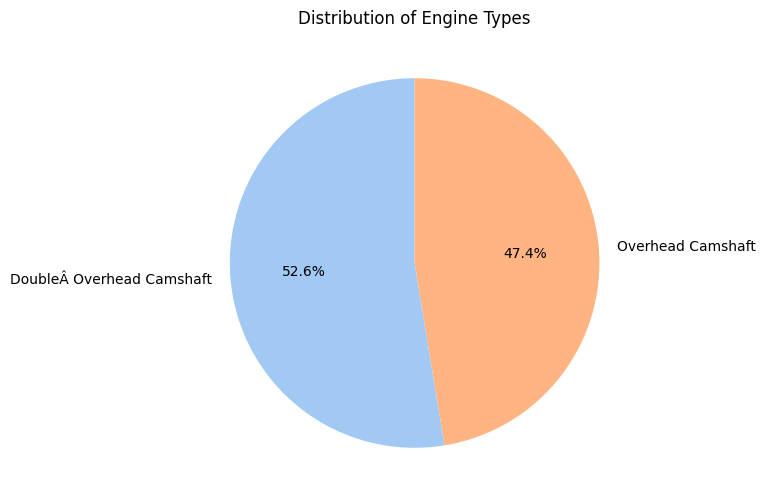

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(df['Engine'].value_counts(), labels=df['Engine'].unique(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Engine Types')
plt.show()

In [ ]:
difference_car_price=df.groupby('Engine')['Price ($)'].describe()
print(difference_car_price)

                             count          mean           std     min  \
Engine                                                                   
DoubleÂ Overhead Camshaft  12571.0  28248.525972  13747.070597  1200.0   
Overhead Camshaft          11335.0  27914.710631  15862.871978  1700.0   

                               25%      50%      75%      max  
Engine                                                         
DoubleÂ Overhead Camshaft  19000.0  24000.0  35500.0  75700.0  
Overhead Camshaft          17000.0  22001.0  34000.0  85800.0  


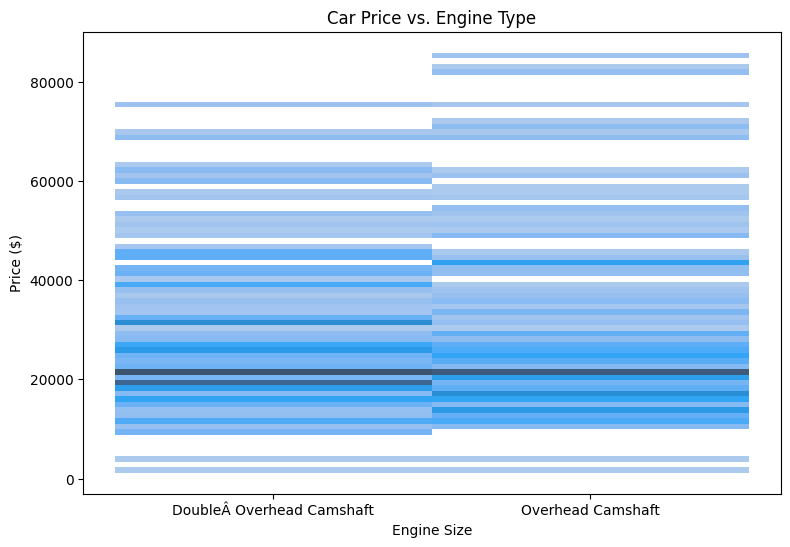

In [ ]:
plt.figure(figsize=(9, 6))
sns.histplot(x='Engine', y='Price ($)', data=df,palette="muted")
plt.title('Car Price vs. Engine Type')
plt.xlabel('Engine Size')
plt.ylabel('Price ($)')
plt.show()

***9.How do car prices vary based on the customer's annual income bracket?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df['Annual Income'].unique()

array([  13500, 1480000, 1035000, ...,  374060, 4111000, 1369000])

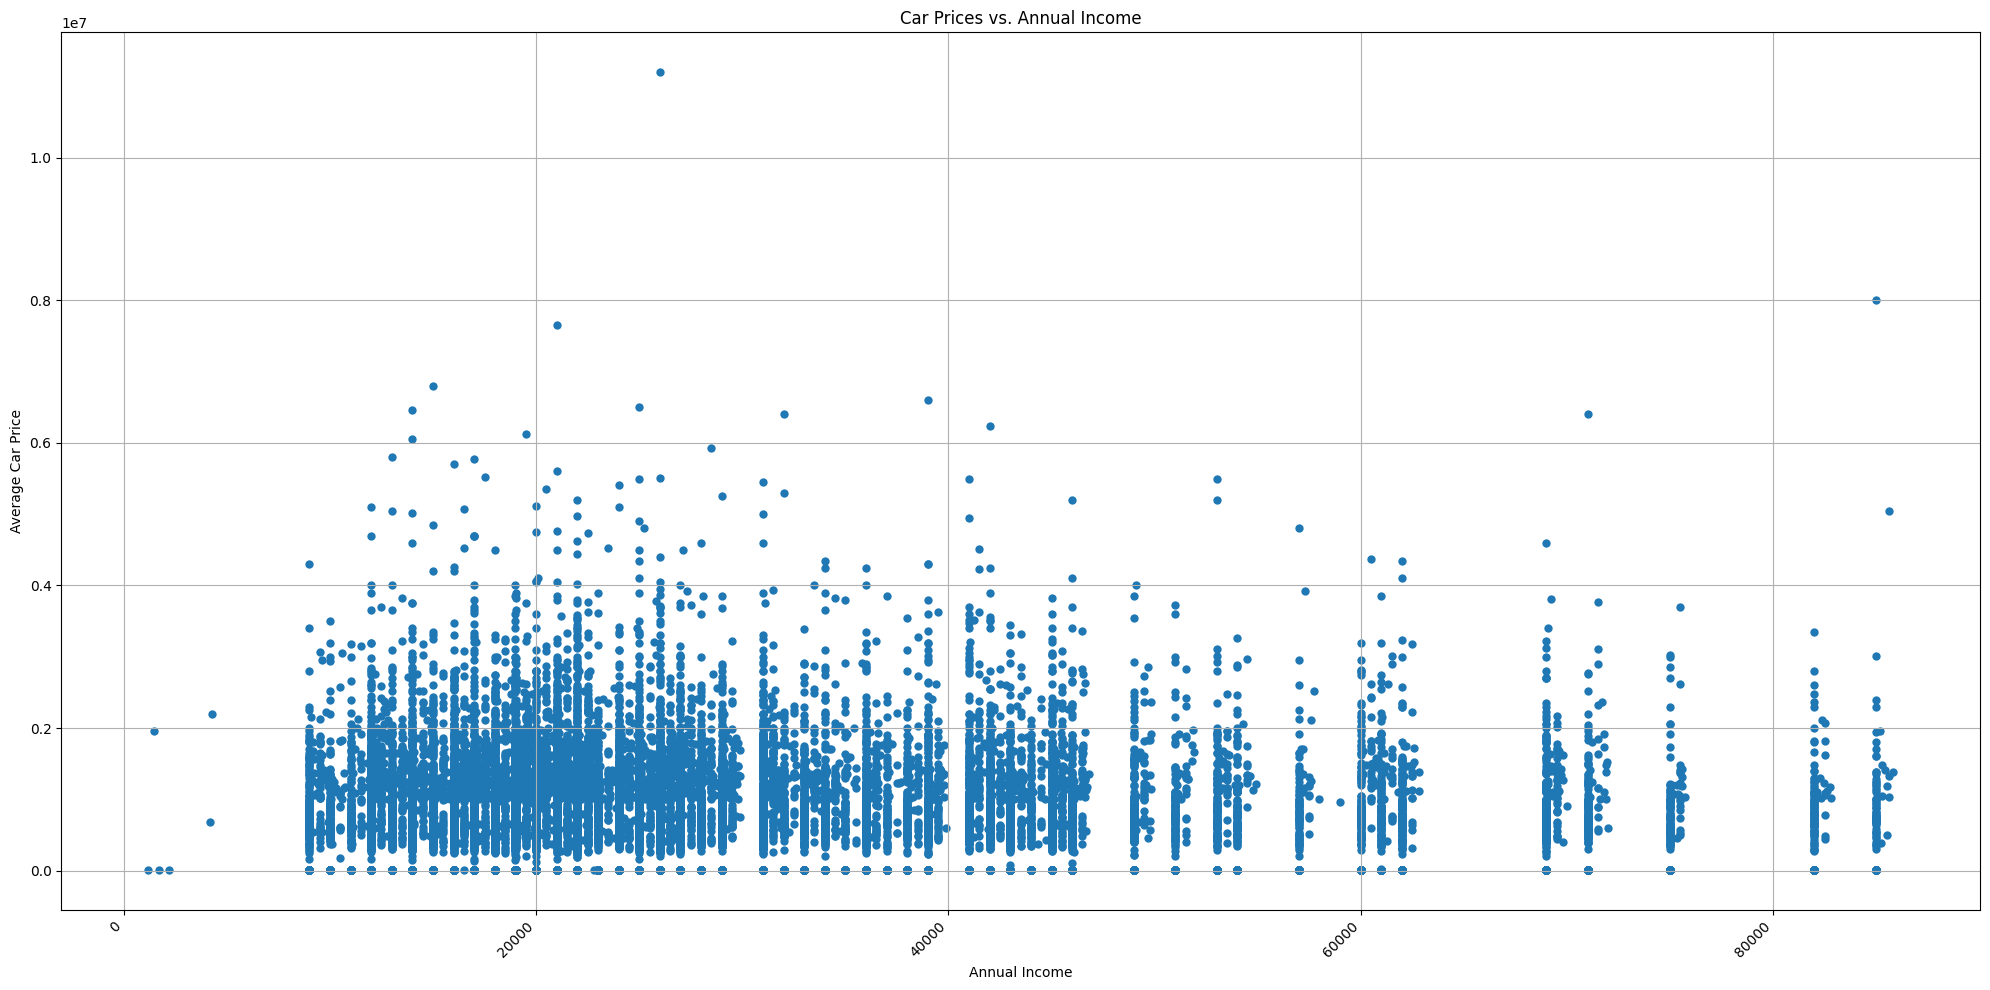

In [ ]:

avg_price_by_income = df.groupby('Annual Income')['Price ($)'].mean()


plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Price ($)'],y=df['Annual Income'],linewidth=0,palette="magma")
plt.title('Car Prices vs. Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Average Car Price')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

Insights:

By examining the output and the visualization, you can draw insights about the relationship. For example:

Positive correlation: You might observe that as annual income increases, the average car price also tends to increase. This suggests a positive correlation between the two variables.
Income brackets: You can identify specific income brackets where the average car price differs significantly. This can help understand the purchasing power of different income groups.
Pricing strategies: The relationship can also provide insights into pricing strategies, such as targeting specific income brackets with different car models or price points.

***10.What are the top 5 models with the highest number of sales and how does their price distribution lock?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
model_sales = df['Model'].value_counts().head(5)
print(model_sales)

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


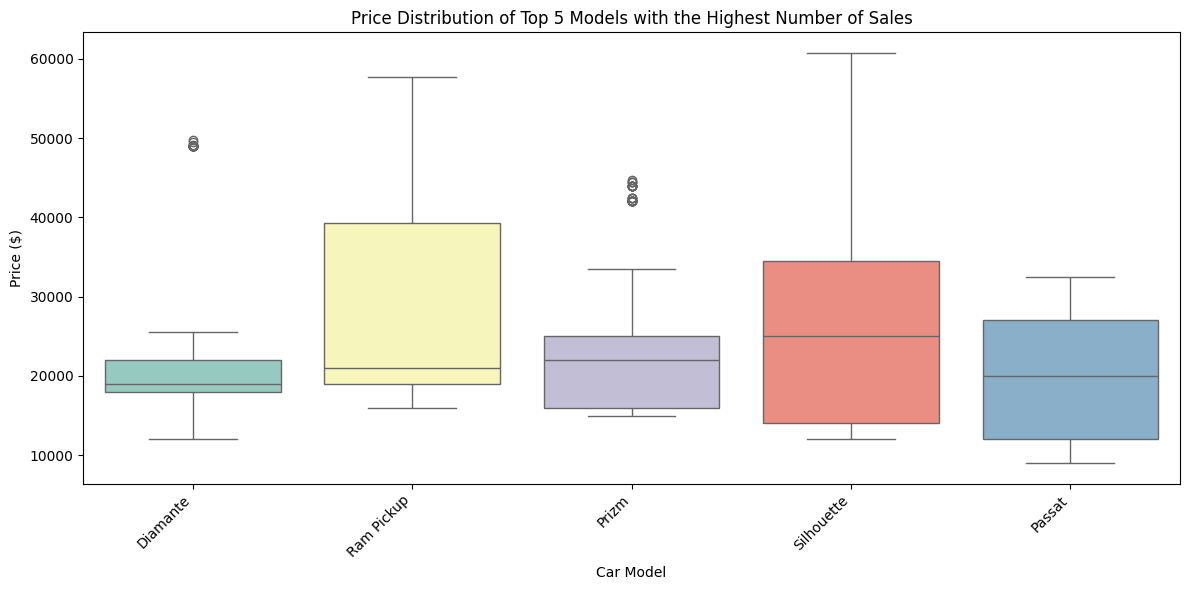

In [ ]:
#Visualize the price distribution of the top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(model_sales.index)], palette='Set3')
plt.title('Price Distribution of Top 5 Models with the Highest Number of Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

***11.How does car price vary with engine size accross different car colors,and which colors have the highest price variation?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df['Color'].unique()

array(['Black', 'Red', 'Pale White'], dtype=object)

In [ ]:
price_by_engine_color = df.groupby(['Engine', 'Color'])['Price ($)'].mean().reset_index()

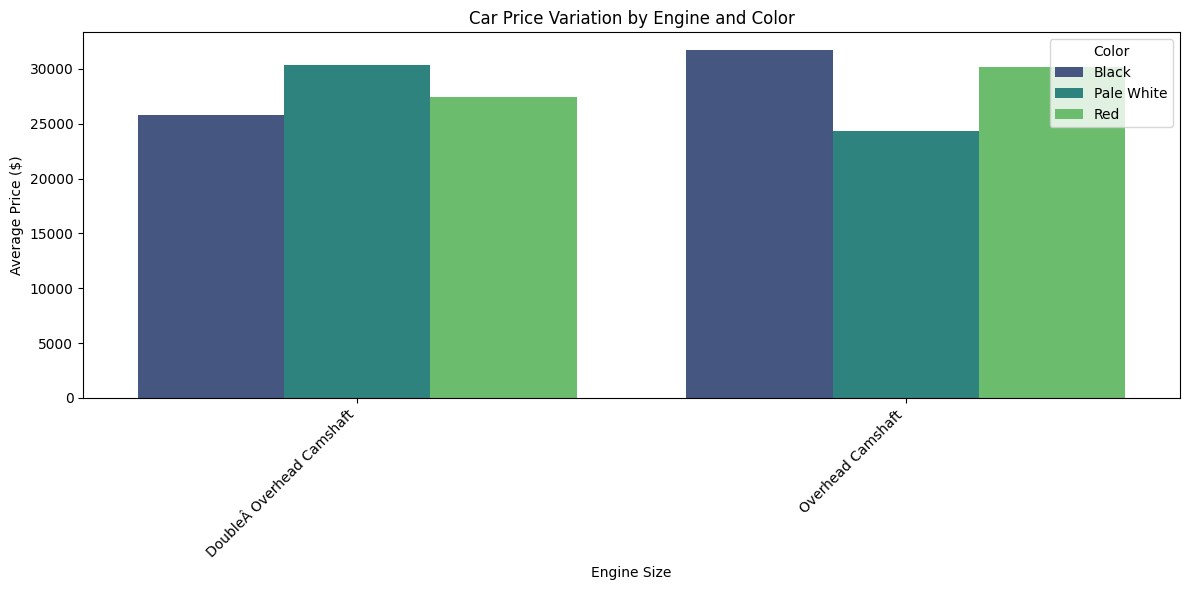

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Engine', y='Price ($)', hue='Color', data=price_by_engine_color, palette='viridis')
plt.title('Car Price Variation by Engine and Color')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

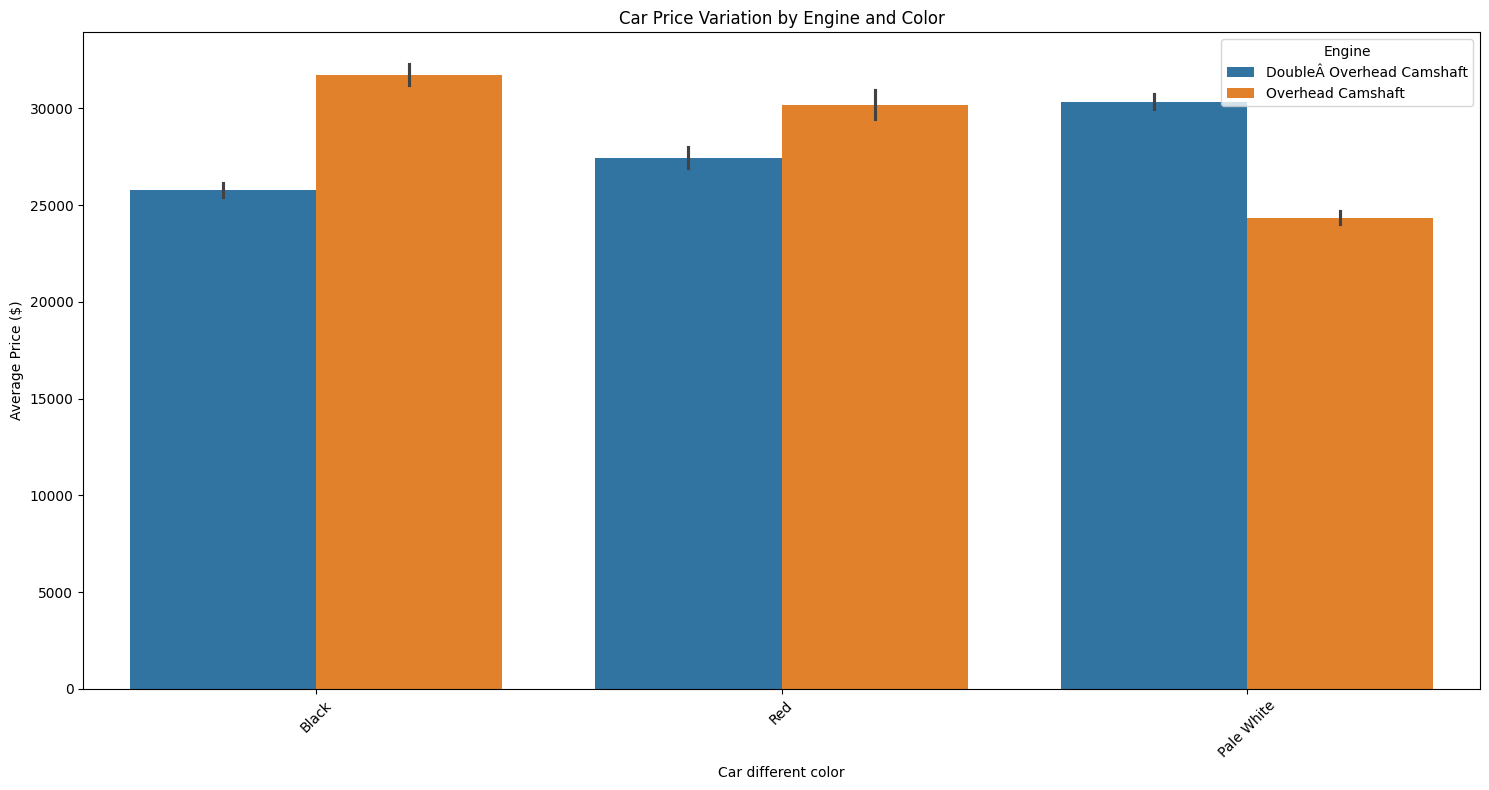

In [ ]:
#Visualize Price Variation:
plt.figure(figsize=(15, 8))
sns.barplot(x='Color', y='Price ($)', hue='Engine', data=df,)
plt.title('Car Price Variation by Engine and Color')
plt.xlabel('Car different color')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Insight:*
visulalize this plot we can see different color and engine type car price are different .We can assume this distribution.

***12.Is there any seasonal trend in car sales based on the date of sale?***

In [ ]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
# Data transformation
df['Date'].value_counts()

,count
Date,
9/5/2023,190
11/10/2023,175
12/29/2023,151
12/11/2023,140
11/24/2023,135
...,...
6/21/2022,5
7/12/2023,5
12/9/2022,5


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
#Extract Month and Quarter:
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# For average price:
monthly_avg_price = df.groupby('Month')['Price ($)'].mean()

# For number of sales:
monthly_sales_count = df.groupby('Month')['Model'].count()

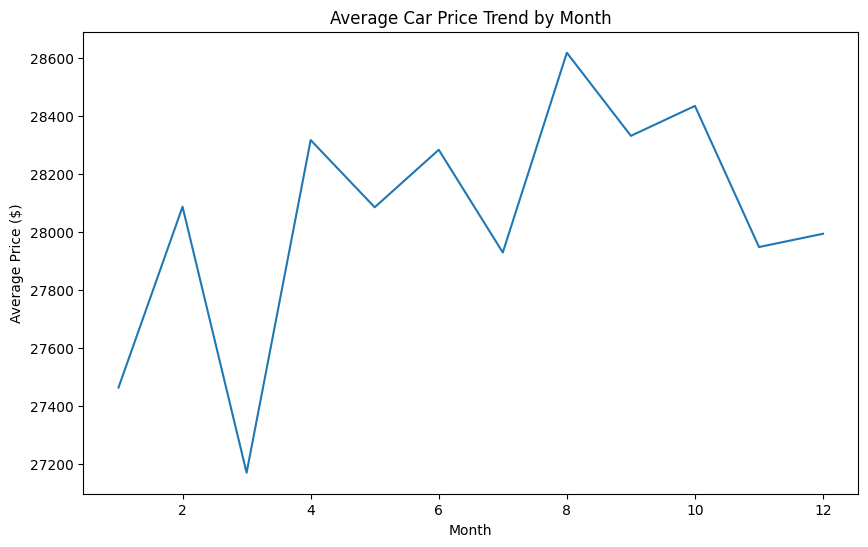

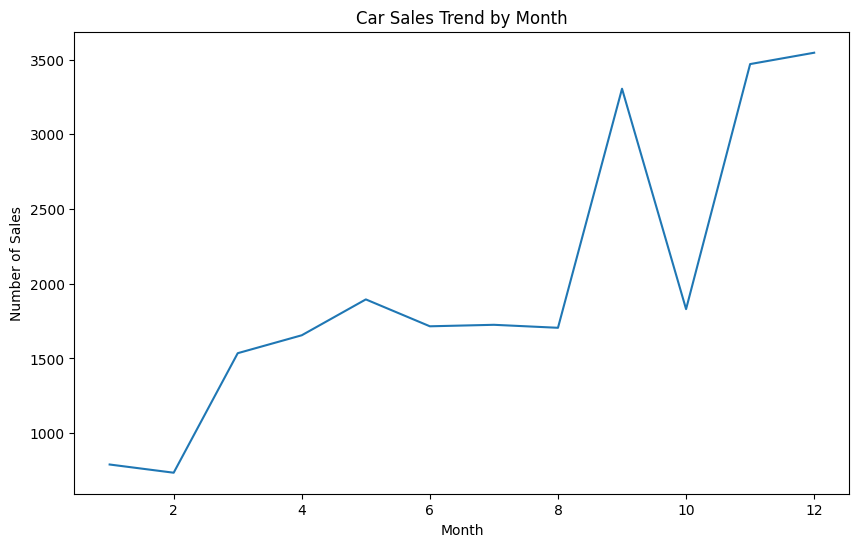

In [ ]:
# For average price:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_avg_price.index, y=monthly_avg_price.values)
plt.title('Average Car Price Trend by Month')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.show()

# For number of sales:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales_count.index, y=monthly_sales_count.values)
plt.title('Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

Insight:

we can  observe higher sales during the spring or fall, it might be worth investigating further to understand the underlying factors influencing this seasonal pattern.

***13.How does the car price distribution change when considering different combination of body style and transmission type?***

In [ ]:
df['Body Style'].value_counts()

,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


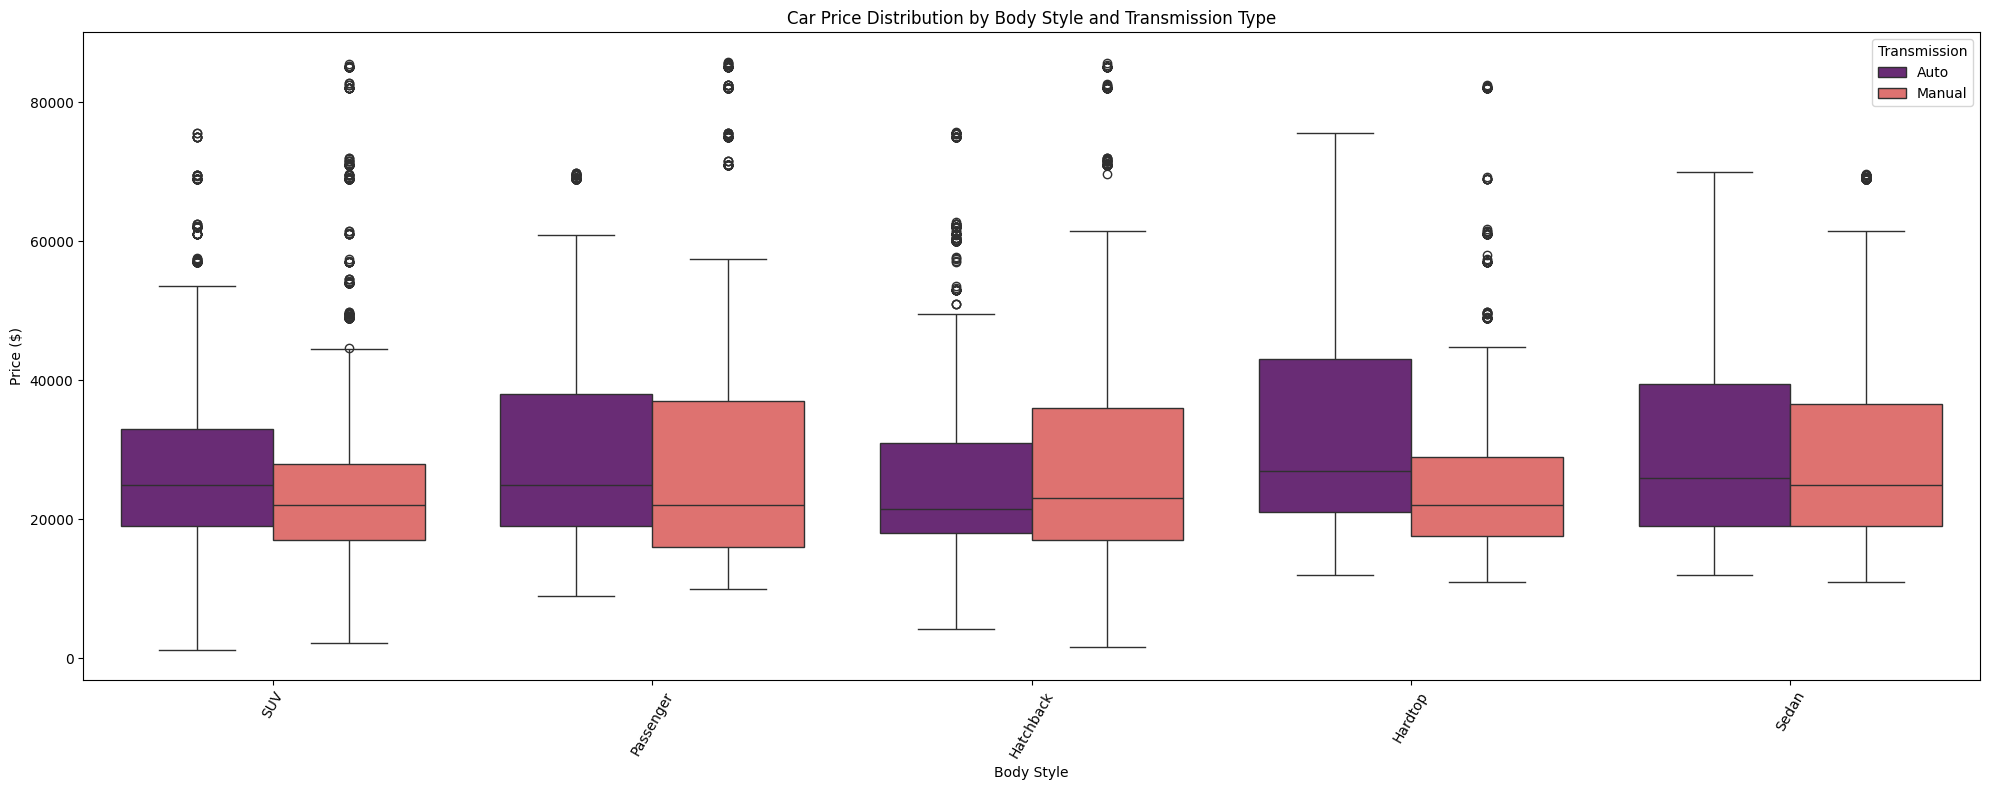

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df, palette='magma')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

***14.What is the correlation between car price,engine size,and annual income of customers and how do these features interact?***

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Engine_encoded'] = encoder.fit_transform(df['Engine'])
correlation= df[['Price ($)','Engine_encoded','Annual Income']]

correlation_2 = correlation.corr()

print(correlation_2)

                Price ($)  Engine_encoded  Annual Income
Price ($)        1.000000       -0.011271       0.012065
Engine_encoded  -0.011271        1.000000      -0.006598
Annual Income    0.012065       -0.006598       1.000000


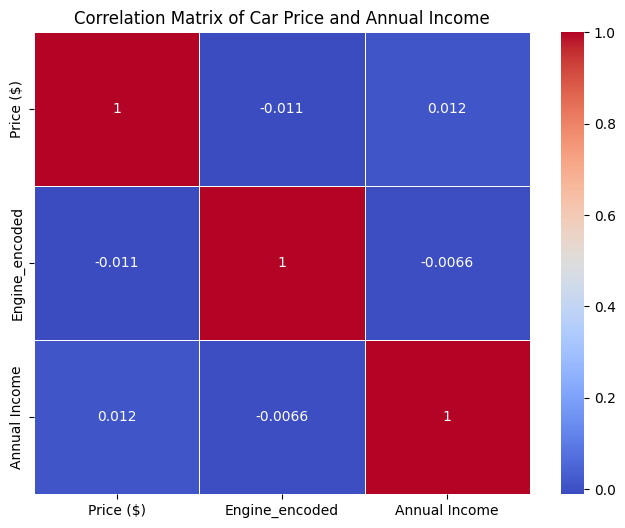

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2, annot=True, cmap='coolwarm',linewidths=.5)
plt.title('Correlation Matrix of Car Price and Annual Income')
plt.show()

Insight:

Higher annual income might enable customers to afford cars with larger engines, leading to the positive correlation between engine size and price.
Customers with larger budgets might be drawn to cars with more features and power, which could explain the correlation between price and annual income.

*Correlation between car price and engine size:*

A positive correlation indicates that cars with larger engines tend to have higher prices.

*Correlation between car price and annual income:*

A positive correlation suggests that customers with higher annual incomes are more likely to purchase more expensive cars.

*Correlation between engine size and annual income:*

A positive correlation implies that customers with higher annual incomes may prefer cars with larger engines.

***15.How does the avarege  car price vary accross different car models and engine types?***

In [ ]:
avg_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
print(avg_price_by_model_engine)

        Model                     Engine     Price ($)
0       3-Sep  DoubleÂ Overhead Camshaft  37986.380117
1      3000GT  DoubleÂ Overhead Camshaft  22764.326923
2      3000GT          Overhead Camshaft  21770.659864
3        300M  DoubleÂ Overhead Camshaft  21394.888889
4        323i  DoubleÂ Overhead Camshaft  16744.632287
..        ...                        ...           ...
256  Windstar          Overhead Camshaft  17100.272727
257  Wrangler  DoubleÂ Overhead Camshaft  21145.294737
258  Wrangler          Overhead Camshaft  18742.942029
259    Xterra  DoubleÂ Overhead Camshaft  15940.459459
260    Xterra          Overhead Camshaft  31072.500000

[261 rows x 3 columns]


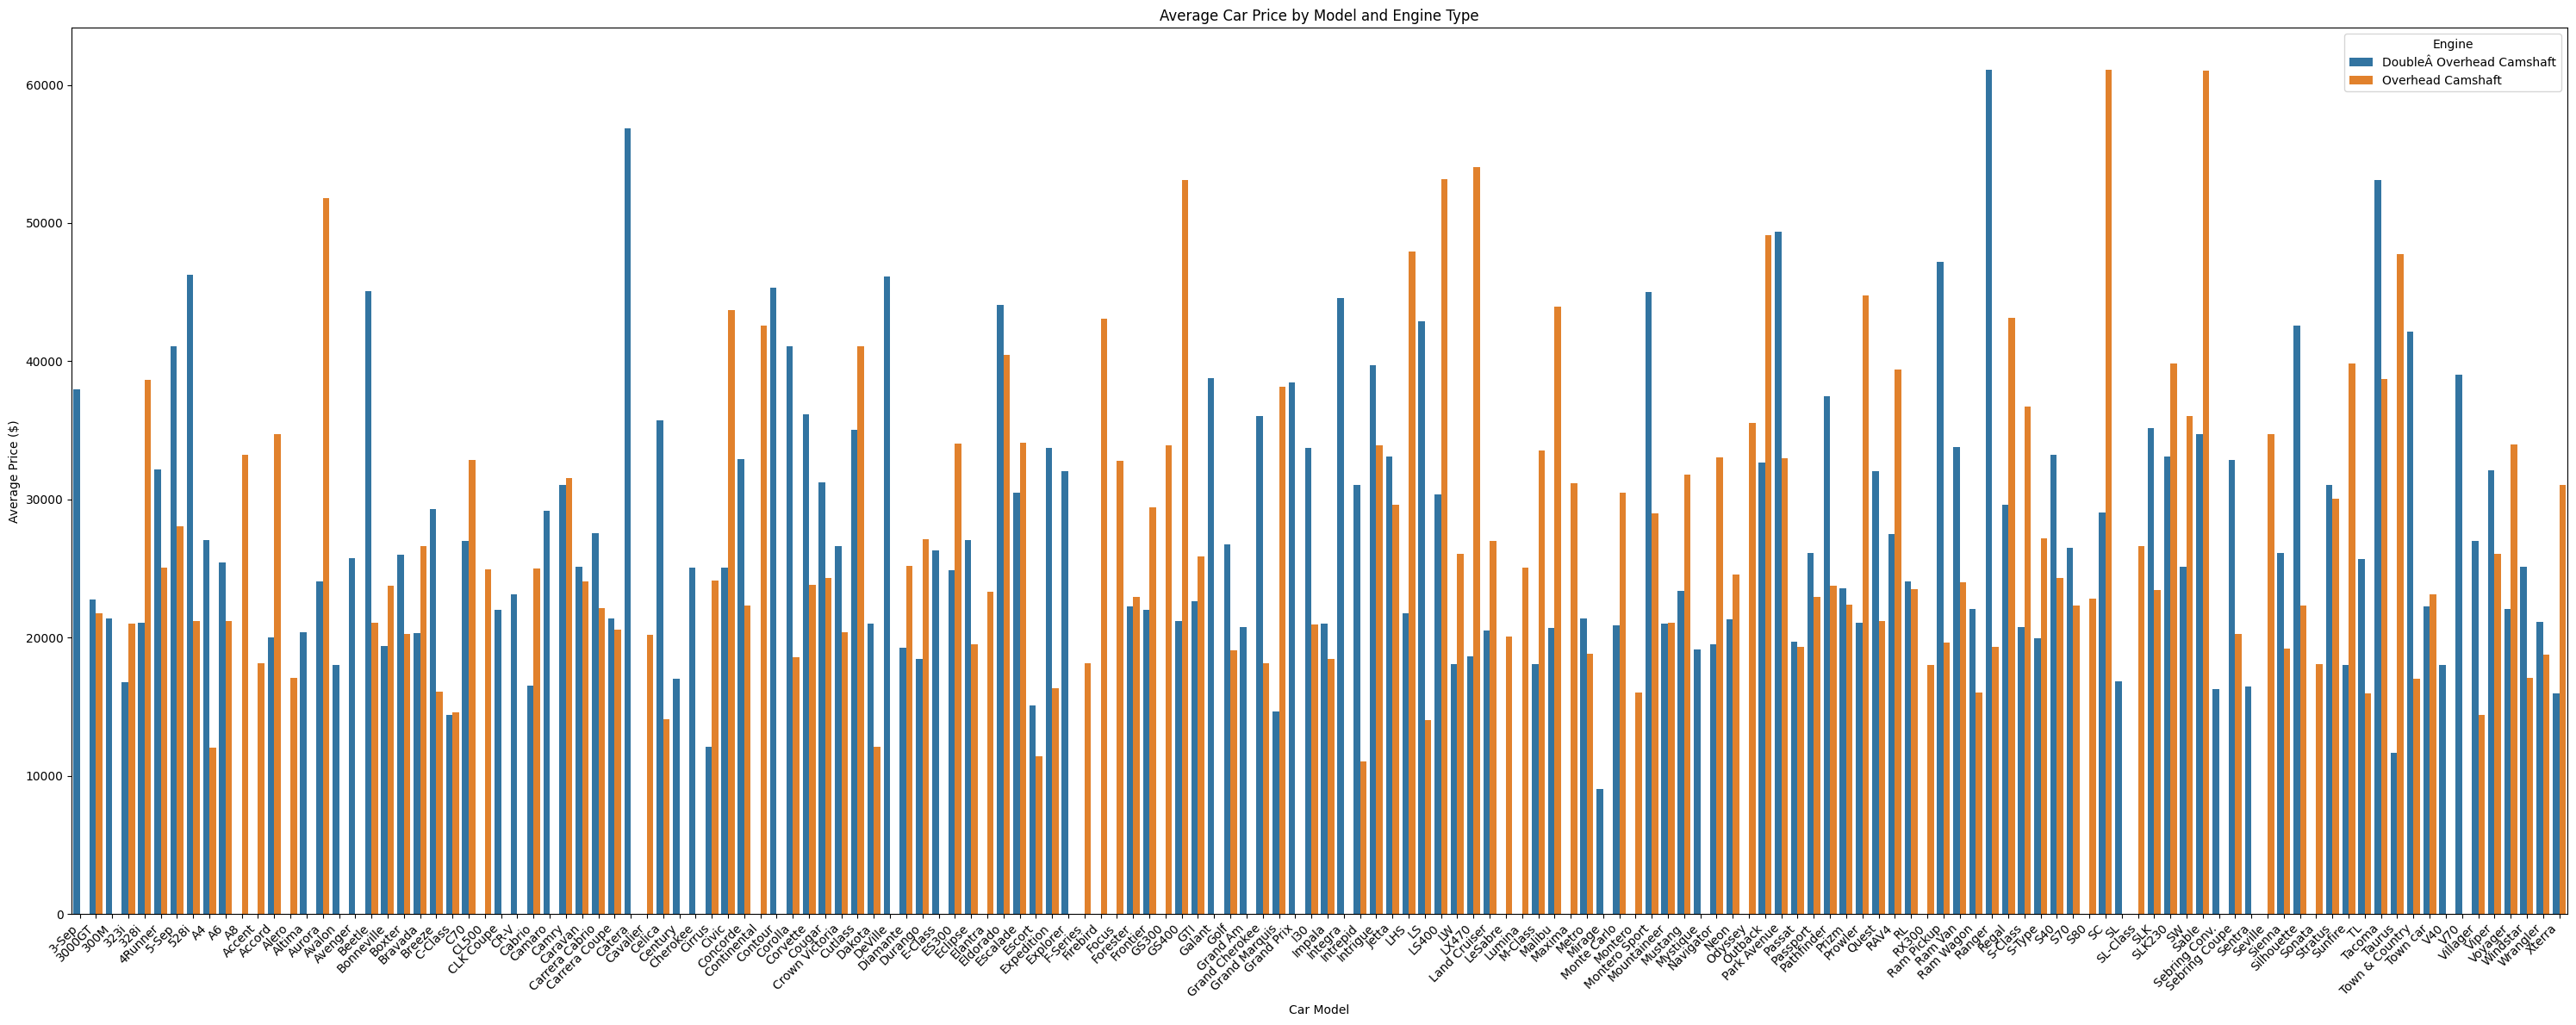

In [ ]:
plt.figure(figsize=(30, 12))
sns.barplot(x='Model', y='Price ($)', hue='Engine', data=avg_price_by_model_engine, palette='tab10')
plt.title('Average Car Price by Model and Engine Type')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 We can effectively analyze and visualize the average car price variation across different car models and engine types, providing valuable insights into pricing trends and customer preferences.